# NEFS Technology Division - Algorithmic Trading Project Template

### Description 

As a group, you have been tasked with researching, implementing and testing a profitable Foreign Exchange (Forex) trading strategy. The pair you have been assigned is GBP/USD.

Each group will have a number of Quants, Software Engineers and Product Managers. You will need to work as a team to allocate responsibilities for the duration of the project. e.g. a Product Manager may be incharge of setting up and maintaining the Jira backlog of tickets. 

You will be provided with a dataset that will allow you to develop and backtest your strategy. This dataset will provide you with all of the relevant data for a number of years. Your strategy will then be tested on a different timeframe to determine it's profitability (Profit/Loss). 

It may be useful to begin the task by trying to understand the 'bigger picture' of how each component of the project would come together i.e the strategy itself, the risk management system, the data and your testing systems.

You will be provided with an initial template to set out the fundamental components of your system, but you can feel free to expand on these as you wish. However, you need to be wary that your strategy **MUST** still be able to be backtested through the function included below. Please **DO NOT** modify this function in any way.

We have seperated your teams to include Analysts of different disciplines, skills and interests. You should capitalise on this to allow everyone to contribute to the project in the best way that they can. 

Some example roles you may want to have (you do not have to stick to these) : 

- Software Engineer 
- Quant Researcher 
- Quant Developer
- Algo Engineer
- Data Scientist
- Product Manager 

Information Links: 

- [Investopedia - Forex Trading](https://www.investopedia.com/terms/f/foreign-exchange.asp)
- [Investopedia - Forex (Definitions, How To and Examples)](https://www.investopedia.com/terms/f/forex.asp)
- [CME Group British Pound GBP/USD Overview](https://www.cmegroup.com/markets/fx/g10/british-pound.html)
- [Yahoo Finance GBP/USD Live Charts](https://finance.yahoo.com/quote/GBPUSD=X?p=GBPUSD=X&.tsrc=fin-srch)
- [Yahoo Finance USD/GBP Live Charts](https://finance.yahoo.com/quote/GBP=X?p=GBP=X&.tsrc=fin-srch)

#### Rules: 

Here are some rules to simplify this task. 

- You can only buy your positions in GBP and sell your positions in USD. 
- You can not leverage or borrow money to buy a position (no negative balances). If your wallet goes to 0 then something is wrong. 
- You can not sell a position you do not have (no shorting)
- When selling a position, you must sell all of the lots within that position. You can not off-load part of your position.


**What is a standard lot in Forex?**

A standard lot in Forex is equal to **100,000 currency units**. It’s the standard unit size for traders, whether independent or institutional.

If the GBP/USD exchange rate was $1.3000, one standard lot of the base currency (GBP) would be 130,000 units. This means, at the current price, you’d need 130,000 units of the quote currency (USD) to buy 100,000 units of GBP.

--- 

### Datasets

Under this section you will find that two initial datasets are being loaded to be used for this project. These datasets are: 

- GBP/USD Historical Prices between 01/01/2010 - 31/12/2020 (Daily)
- USD/GBP Historical Prices between 01/01/2010 - 31/12/2020 (Daily)

Through your research, you may also find that other datasets across the internet may prove useful in your strategy e.g. Geopolitical data, other currency pairs etc. Feel free to use such datasets to help improve your strategy if you would like to do so. 

In [87]:
#importing some popular packages that you may find useful

import pandas as pd 
import numpy as np 
import matplotlib as plt
from enum import Enum
from datetime import datetime
import uuid 
import string
from fredapi import Fred
import requests
import json
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Ignore

In [61]:
###No Need to Run this Cell


# replace YOUR_API_KEY with your actual API key from Alpha Vantage
api_key_alpha = "96ZPYBUX90A57VB4"
api_key_FRED = Fred(api_key='755ffdaf8ddade36ae12b4bb96d45bb8')


# define the API endpoints for each data type
treasureChest = f"https://www.alphavantage.co/query?function=TREASURY_YIELD&time_from=20040101T0100&time_to=20200101T0000&interval=daily&maturity=2year&datatype=csv&apikey={api_key_alpha}"
fedFunds = f"https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&time_from=20040101T0100&time_to=20200101T0000&interval=daily&datatype=csv&apikey={api_key_alpha}"
cpi = f"https://www.alphavantage.co/query?function=CPI&time_from=20040101T0100&time_to=20200101T0000&interval=monthly&datatype=csv&apikey={api_key_alpha}"
nonFarm = f"https://www.alphavantage.co/query?function=NONFARM_PAYROLL&time_from=20040101T0100&time_to=20200101T0000&datatype=csv&apikey={api_key_alpha}"
newsToConvert = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=GBPUSD&topics=economy_fiscal,economy_monetary,economy_macro&time_from=20040101T0100&time_to=20200101T0100&sort=LATEST&apikey={api_key_alpha}"

# retrieve the data from the API endpoints and store in a Pandas DataFrame



for i in stuff:
   newStuff.append(requests.get(i))




NameError: name 'stuff' is not defined

In [62]:
stuff = [treasureChest,fedFunds,cpi,nonFarm]
newStuff=[]
names = ["treasureChest","fedFunds","cpi","nonFarm"]
for j in range(len(newStuff)):
    #with open(f'{names[j]}.csv', 'wb') as f:
     #   f.write(newStuff[j].content)

# Load CSV file into Pandas dataframe
    dt = pd.read_csv(f'{names[j]}.csv')
    dt = dt[::-1]
    print(dt.head())

# EndIgnore

In [63]:

complete_gbp_usd_dataset = pd.read_csv('GBPUSD_2010_2022.csv')
complete_usd_gbp_dataset = pd.read_csv('USDGBP_2010_2022.csv')

complete_gbp_usd_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,1.618202,1.618202,1.613111,1.613294,1.613294,0.0
1,2010-01-04,1.613710,1.623904,1.606503,1.611370,1.611370,0.0
2,2010-01-05,1.611863,1.615587,1.597010,1.599079,1.599079,0.0
3,2010-01-06,1.599360,1.606323,1.594388,1.602384,1.602384,0.0
4,2010-01-07,1.602205,1.605858,1.590078,1.593397,1.593397,0.0
...,...,...,...,...,...,...,...
2865,2020-12-25,1.356963,1.361300,1.351534,1.355201,1.355201,0.0
2866,2020-12-28,1.357368,1.357773,1.343598,1.357239,1.357239,0.0
2867,2020-12-29,1.346566,1.352064,1.346185,1.346602,1.346602,0.0
2868,2020-12-30,1.349764,1.361748,1.349455,1.349990,1.349990,0.0


In [64]:
allNames = ["treasureChest.csv","fedFunds.csv","cpi.csv","nonFarm.csv","GDP.csv","A939RX0Q048SBEA.csv","CORESTICKM159SFRBATL.csv","TOTALSA.csv","UNRATE.csv"]
datas = []

data = pd.DataFrame(complete_gbp_usd_dataset)
prices = pd.DataFrame(complete_gbp_usd_dataset)

for i in allNames:
    df = pd.read_csv(i)
    df = df[::-1]
    data = pd.merge(data,df,on="Date",how="outer")

data = data.set_index("Date")
data

,Open,High,Low,Close,Adj Close,Volume,treasureAmount,fed,consumerStuff,nonFarm,GDP,A939RX0Q048SBEA,CORESTICKM159SFRBATL,TOTALSA,UNRATE
Date,,,,,,,,,,,,,,,
2010-01-01,1.618202,1.618202,1.613111,1.613294,1.613294,0.0,.,0.05,216.687,127804.0,14764.611,50036.0,1.177002,10.893,9.8
2010-01-04,1.613710,1.623904,1.606503,1.611370,1.611370,0.0,1.09,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,1.611863,1.615587,1.597010,1.599079,1.599079,0.0,1.01,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,1.599360,1.606323,1.594388,1.602384,1.602384,0.0,1.01,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,1.602205,1.605858,1.590078,1.593397,1.593397,0.0,1.03,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.900,48543.0,NaN,NaN,NaN,NaN,5.2
1954-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.900,48519.0,NaN,NaN,NaN,NaN,5.7
1954-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.800,48787.0,386.121,16387.0,NaN,NaN,5.9


In [65]:
data["treasureAmount"] = data["treasureAmount"].replace(".",np.nan)
data = data.dropna(subset=["Open"])


data

,Open,High,Low,Close,Adj Close,Volume,treasureAmount,fed,consumerStuff,nonFarm,GDP,A939RX0Q048SBEA,CORESTICKM159SFRBATL,TOTALSA,UNRATE
Date,,,,,,,,,,,,,,,
2010-01-01,1.618202,1.618202,1.613111,1.613294,1.613294,0.0,NaN,0.05,216.687,127804.0,14764.611,50036.0,1.177002,10.893,9.8
2010-01-04,1.613710,1.623904,1.606503,1.611370,1.611370,0.0,1.09,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,1.611863,1.615587,1.597010,1.599079,1.599079,0.0,1.01,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,1.599360,1.606323,1.594388,1.602384,1.602384,0.0,1.01,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,1.602205,1.605858,1.590078,1.593397,1.593397,0.0,1.03,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,1.356963,1.361300,1.351534,1.355201,1.355201,0.0,NaN,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,1.357368,1.357773,1.343598,1.357239,1.357239,0.0,0.13,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29,1.346566,1.352064,1.346185,1.346602,1.346602,0.0,0.12,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
data = data.fillna(method="ffill",inplace=False)
data = data.dropna(axis=0)
data.to_csv("my_data.csv")
data["Date"] = data["Open"]
data


,Open,High,Low,Close,Adj Close,Volume,treasureAmount,fed,consumerStuff,nonFarm,GDP,A939RX0Q048SBEA,CORESTICKM159SFRBATL,TOTALSA,UNRATE,Date
Date,,,,,,,,,,,,,,,,
2010-01-04,1.613710,1.623904,1.606503,1.611370,1.611370,0.0,1.09,0.12,216.687,127804.0,14764.611,50036.0,1.177002,10.893,9.8,1.613710
2010-01-05,1.611863,1.615587,1.597010,1.599079,1.599079,0.0,1.01,0.12,216.687,127804.0,14764.611,50036.0,1.177002,10.893,9.8,1.611863
2010-01-06,1.599360,1.606323,1.594388,1.602384,1.602384,0.0,1.01,0.12,216.687,127804.0,14764.611,50036.0,1.177002,10.893,9.8,1.599360
2010-01-07,1.602205,1.605858,1.590078,1.593397,1.593397,0.0,1.03,0.10,216.687,127804.0,14764.611,50036.0,1.177002,10.893,9.8,1.602205
2010-01-08,1.593803,1.610099,1.591799,1.602410,1.602410,0.0,0.96,0.11,216.687,127804.0,14764.611,50036.0,1.177002,10.893,9.8,1.593803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,1.356963,1.361300,1.351534,1.355201,1.355201,0.0,0.13,0.09,260.474,143604.0,21704.706,56993.0,1.716599,16.927,6.7,1.356963
2020-12-28,1.357368,1.357773,1.343598,1.357239,1.357239,0.0,0.13,0.09,260.474,143604.0,21704.706,56993.0,1.716599,16.927,6.7,1.357368
2020-12-29,1.346566,1.352064,1.346185,1.346602,1.346602,0.0,0.12,0.09,260.474,143604.0,21704.706,56993.0,1.716599,16.927,6.7,1.346566


# Ignore

In [196]:
# Load and preprocess data

data['returns'] = (data['Close']-data['Close'].shift(-10)) # calculate daily returns
data['direction'] = np.where(data["returns"]>0, 1, 0) # define target variable

# Split data into training and testing sets
train_size = int(len(data) * 0.8)

# Define features and target
features = ["Open",	"High",	"Low",	"Close",	"Adj Close",	"Volume",	"treasureAmount",	"fed",	"consumerStuff",	"nonFarm",	"GDP",	"A939RX0Q048SBEA",	"CORESTICKM159SFRBATL","TOTALSA","UNRATE"] # add your desired features
target = 'direction'

# Split data into X and y
X_train, X_test = train_data[features], test_data[features]
y_train, y_test = train_data[target], test_data[target]

# Define and train model
model = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=500, alpha=0.0001, solver='adam', 
                    verbose=10, random_state=42, tol=0.000001,activation="relu")

model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"This is the accuracy: {accuracy}")



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [108]:
st = pd.DataFrame(y_pred)
st.to_csv("direction.csv")

# EndIgnore

### Portfolio 

Under this section you will find the boiler plate code for this task. This includes a class named 'portfolio' which will house key data around your trades such as your budget (monetary portfolio), net profit/loss, current positions and number of trades executed etc.

Each time you run a backtest of your strategy, this object will be reinstatiated and repopulated with the latest backtest results.

You **MUST NOT** modify this code in any way. If you suspect there is a bug, please let Ahmed know and he will look into resolving it.


## All of the backend code. DO NOT CHANGE THIS SECTION IN ANY WAY.

In [41]:
INITIAL_WALLET_CASH = 5000000
STANDARD_LOT = 100000

class Side(Enum):
    BUY = 'BUY'
    SELL = 'SELL'
    
class Currency(Enum):
    GBP = 'GBP'
    USD = 'USD'
    
class Position:
    def __init__(self,
                 date:datetime,
                 size:int,
                 price,
                 currency:Currency,
                 side:Side):
        
        self._id = str(uuid.uuid4())
        self._date = date
        self._currency = currency
        self._price = price
        self._size = size
        self._side = side
        
class Order:
    def __init__(self,
                 position:Position):
        self._id = str(uuid.uuid4())
        self._position = position
    
    def describe(self):
        return f"<Order id: {self._id} position: {self._position}>"

class Portfolio:
    
    def __init__(self):
        self.cash_wallet = INITIAL_WALLET_CASH  # wallet is in GBP
        self.current_positions = {}
        self.closed_positions = {}
    
    def add_position(self,position):
        self.current_positions[position._id] = position
        self.deduct_from_wallet(self.calculate_deduction(position))
                
    def sell_position(self,position:Position):
        self.current_positions.pop(position._id)
        self.closed_positions[position._id] = position
    
    def get_wallet_value(self):
        return self.cash_wallet
    
    def deduct_from_wallet(self,amount):
        self.cash_wallet -= amount
        
    def add_to_wallet(self,amount):
        self.cash_wallet += amount
        
    def calculate_fees(self,position:Position):
        fee = position._size * 2 #broker fee is £2 per standard lot 
        print("FEE CHARGED: £",fee)
        return fee 
    
    def calculate_total_cost_in_gbp(self,position:Position):
        if(position._currency == Currency.GBP):
            return position._price * (position._size * STANDARD_LOT)
        # elif(position._currency == Currency.USD):
        #     return position._price * current_gbp_price  * (position._size * 100000) # x100000 for standard lot

    def calculate_deduction(self,position):
        return self.calculate_total_cost_in_gbp(position) + self.calculate_fees(position)
    

## You can edit from this point onwards 

In [194]:
def strategy(data):
    
    FIXED_LOT_SIZE = 1
    A_REALLY_BIG_NUMBER = 100000000
    A_REALLY_SMALL_NUMBER = 0.0000000000001
    
    orders = {}
    tp_prices=[]
    sl_prices=[]
    crit=False
    
    # calculate Bollinger Bands
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['MA20_std'] = data['Close'].rolling(window=20).std()
    data['Upper_band'] = data['MA20'] + (data['MA20_std'] * 2)
    data['Lower_band'] = data['MA20'] - (data['MA20_std'] * 2)
    
    # calculate RSI
    period = 14
    delta = data['Open'].diff()
    delta = delta[1:]
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    AVG_Gain = up.rolling(window=period).mean()
    AVG_Loss = abs(down.rolling(window=period).mean())
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0 / (1.0 + RS))
    data['RSI'] = RSI

     # calculate Moving Average Convergence Divergence (MACD)
    period_short = 12
    period_long = 26
    data['EMA_short'] = sum(data['Close'][len(data)-period_short:])/period_short
    data['EMA_long'] = sum(data['Close'][len(data)-period_long:])/period_long
    data['MACD'] = data['EMA_short'] - data['EMA_long']
    data['Signal'] = sum(data['MACD'][len(data)-9:])/9

    # calculate Stochastic Oscillator
    period = 14
    data['L14'] = data['Low'].rolling(window=period).min()
    data['H14'] = data['High'].rolling(window=period).max()
    data['%K'] = (data['Close'] - data['L14']) / (data['H14'] - data['L14']) * 100
    data['%D'] = data['%K'].rolling(window=3).mean()
    
    for index,row in data.iterrows():
        currentP = row["Open"]+row["Close"]/2
        date = datetime.strptime(str(row["Date"]),'%Y-%m-%d').date()
        tick=0
        buys=[]
       
        
        if (tp_prices != []):
            cTP = min(tp_prices)
            
            while(currentP>=cTP):
                
                sell_position = Position(date,FIXED_LOT_SIZE,row.Open,Currency.GBP,Side.SELL)
                sell_order = Order(sell_position)
                orders[sell_order._id] = sell_order
                
                tp_prices.pop(tp_prices.index(cTP))
                print(f"popped {cTP}")
                try:
                    cTP = min(tp_prices)
                except ValueError:
                    print("tp empty")
                    cTP = A_REALLY_BIG_NUMBER
        if (sl_prices != []):

            cSL = max(sl_prices)

            while(currentP<=cSL):
                
                sell_position = Position(date,FIXED_LOT_SIZE,row.Open,Currency.GBP,Side.SELL)
                sell_order = Order(sell_position)
                orders[sell_order._id] = sell_order

                sl_prices.pop(sl_prices.index(cSL))
                print(f"popped {cSL}")
                try:
                    cSL = max(sl_prices)

                except ValueError:
                    print("sl empty")
                    cSL = A_REALLY_SMALL_NUMBER
    
        
        if((row["Close"] < row["Lower_band"] and row["RSI"] < 34) or row["MACD"] > row["Signal"] and (row["%K"] < 20 and row["%D"] < 20 and row["%K"]<row["%D"])):
            
            #if we have money available in the wallet, we can buy
            buy_position = Position(date,FIXED_LOT_SIZE,row.Open,Currency.GBP,Side.BUY)
            buy_order = Order(buy_position)
            orders[buy_order._id] = buy_order
            tp_prices.append(row["Close"] + (row["MA20_std"] * 2))
            sl_prices.append(row["Close"] - (row["MA20_std"] * 2))
            

        if(row["Close"] > row["Upper_band"] or row["RSI"] > 70 or row["MACD"] < row["Signal"] and (row["%K"] > 80 and row["%D"] > 80 and row["%K"]<row["%D"])):
            
            sell_position = Position(date,FIXED_LOT_SIZE,row.Open,Currency.GBP,Side.SELL)
            sell_order = Order(sell_position)
            orders[sell_order._id] = sell_order
        for i in buys:
                    sell_position = Position(date,FIXED_LOT_SIZE,row.Open,Currency.GBP,Side.SELL)
                    sell_order = Order(sell_position)
                    orders[sell_order._id] = sell_order
                    buys.pop()

        print(buys)
   
    return orders




In [195]:
# You can use this function to backtest your strategy 
# The function will call your strategy and then execute the orders in the sequence you made them
# Once all of your orders have been completed, you will be shown your final wallet amount and your Profit/Loss.
def local_backtest_strategy(data):
    
    # Initialising the portfolio. £5,000,000 cash and no positions. 
    portfolio = Portfolio()
    order_queue = strategy(data) #calls your function to get all of the orders
    
    for index,order in order_queue.items():
    
        if(order._position._side == Side.BUY):
            # if you have enough cash, you can make the purchase 
            if portfolio.calculate_total_cost_in_gbp(order._position) <= portfolio.cash_wallet:
                portfolio.add_position(order._position)
                print(f"BUY ORDER FILLED : (ID) {str(order._id).upper()}")
            else: 
                print("BOOK CASH IS INSUFFICIENT")
                
        if(order._position._side == Side.SELL):
            # finding the position we want to sell from our current positions within portfolio
            matching_position  = next((position for position in portfolio.current_positions.values()
                                   if position._side == Side.BUY 
                                   and position._size == order._position._size 
                                   and position._price < order._position._price
                                   and position._date < order._position._date)
                                   ,None)
            
            if(matching_position != None):
                sale_earning = order._position._price * (order._position._size * STANDARD_LOT) 
                portfolio.add_to_wallet(sale_earning)
                portfolio.sell_position(matching_position)
                print(f"SELL ORDER FILLED : (ID) {str(order._id).upper()}")
            else:
                print("NO MATCHING POSITION FOUND")
    
    print("ALL ORDERS HAVE BEEN FILLED.")
    print("BOOK CASH LEVEL:", ("£%.2f" % portfolio.cash_wallet))
    
    pnl = portfolio.cash_wallet - INITIAL_WALLET_CASH 
    
    if(pnl < 0):
        print("TOTAL LOSS",("£%.2f" % abs(pnl)))
    else:
        print("TOTAL PROFIT",("£%.2f" % pnl))

local_backtest_strategy(prices)

0
[]
1
[]
2
[]
3
[]
4
[]
5
[]
6
[]
7
[]
8
[]
9
[]
10
[]
11
[]
12
[]
13
[]
14
[]
15
[]
16
[]
17
[]
18
[]
19
[]
20
[]
21
[]
22
[]
23
[]
24
[]
25
popped 1.60919287357479
tp empty
[]
26
popped 1.6043617997218467
tp empty
[]
27
popped 1.60329677662149
tp empty
[]
28
[]
29
[]
30
[]
31
[]
32
[]
33
[]
34
[]
35
[]
36
[]
37
[]
38
[]
39
[]
40
[]
41
[]
42
popped 1.5462988703819815
tp empty
[]
43
[]
44
[]
45
[]
46
[]
47
[]
48
[]
49
[]
50
[]
51
[]
52
[]
53
[]
54
[]
55
[]
56
[]
57
[]
58
[]
59
[]
60
[]
61
[]
62
[]
63
[]
64
[]
65
[]
66
[]
67
[]
68
[]
69
[]
70
[]
71
[]
72
[]
73
[]
74
[]
75
[]
76
[]
77
[]
78
[]
79
[]
80
[]
81
[]
82
[]
83
[]
84
[]
85
[]
86
[]
87
[]
88
[]
89
[]
90
popped 1.5158496118249885
tp empty
[]
91
popped 1.5158470752350024
tp empty
[]
92
[]
93
[]
94
[]
95
popped 1.5122090782719502
tp empty
[]
96
popped 1.5106491423042456
tp empty
[]
97
[]
98
popped 1.499554831179644
tp empty
[]
99
[]
100
[]
101
[]
102
[]
103
[]
104
[]
105
[]
106
[]
107
[]
108
[]
109
[]
110
[]
111
[]
112
[]
113
[]
11

## Data Analysis and Research

You can include all of your data analysis and research under this section. Maybe some cool charts and formulas too?

Text(0, 0.5, 'Price (GBP/USD)')

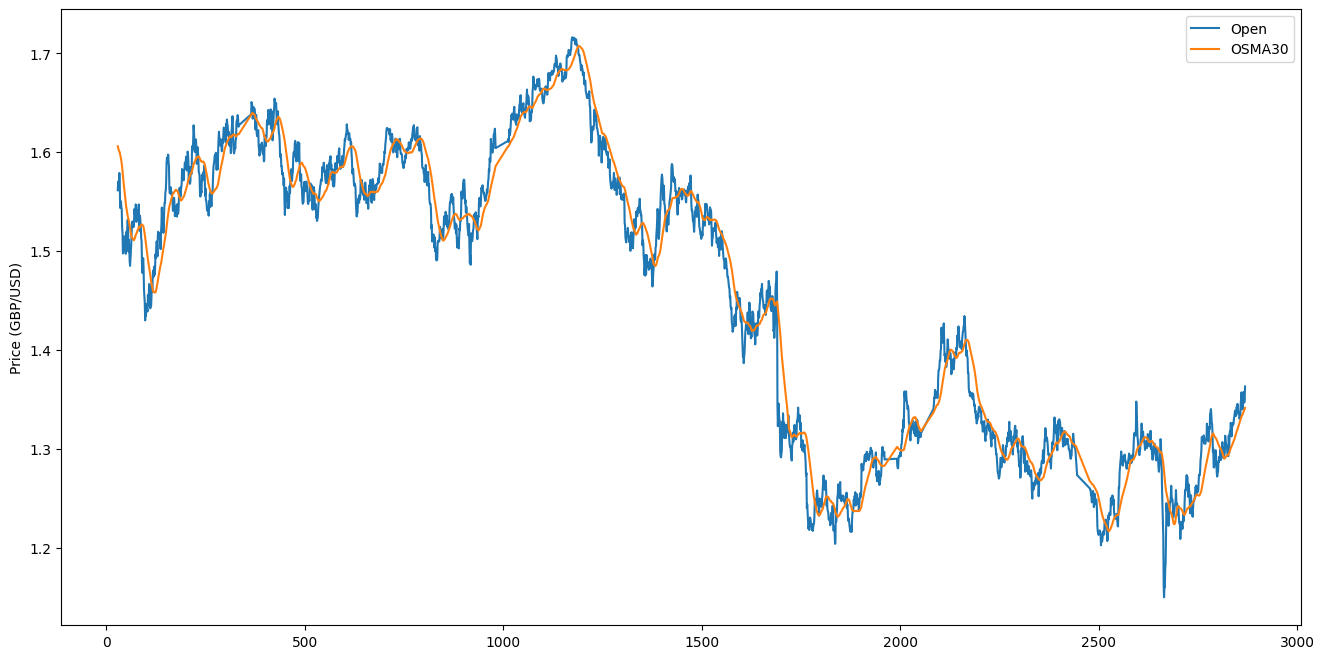

In [11]:
plot = data[['Open','OSMA30']].plot(label='GBP/USD',figsize=(16,8))
plot.set_ylabel("Price (GBP/USD)")

## Risk Management 

You can include your risk management process and functions (code) under this section.

In [ ]:
def risk_manager():
    pass 